
# 💰 Personal Expense Tracker

This notebook helps you track, analyze, and visualize your personal expenses efficiently.  
It includes data recording, monthly summaries, and visual insights using **Matplotlib** and **Seaborn**.

---


# 🧾 Personal Expense Tracker
A Python mini project implemented as a Jupyter Notebook.

This tracker allows you to:
- Add, view, edit, delete expenses
- Save and load data from a JSON file
- Visualize spending using Matplotlib

Run each cell in order to interact with the program.

## 📦 Importing Required Libraries
We import the necessary libraries for data manipulation, visualization, and file handling.

In [14]:

import json
import os
import pandas as pd
from datetime import datetime
from typing import List, Dict, Any

try:
    import matplotlib.pyplot as plt
    HAVE_MPL = True
except Exception:
    HAVE_MPL = False

DATA_FILE = "expenses.json"


In [3]:

def load_expenses(filename: str = DATA_FILE) -> List[Dict[str, Any]]:
    if not os.path.exists(filename):
        return []
    try:
        with open(filename, 'r', encoding='utf-8') as f:
            data = json.load(f)
        if not isinstance(data, list):
            return []
        cleaned = []
        for e in data:
            try:
                amount = float(e.get("amount"))
                category = str(e.get("category")).strip()
                date = e.get("date")
                datetime.strptime(date, "%Y-%m-%d")
                cleaned.append({"amount": amount, "category": category, "date": date})
            except Exception:
                continue
        return cleaned
    except Exception:
        return []

def save_expenses(expenses: List[Dict[str, Any]], filename: str = DATA_FILE):
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(expenses, f, indent=4, ensure_ascii=False)
    except Exception as e:
        print(f"Error saving expenses: {e}")


In [5]:

def add_expense(expenses: List[Dict[str, Any]]):
    try:
        amount = float(input("Enter amount: "))
    except ValueError:
        print("Invalid amount.")
        return
    category = input("Enter category: ").strip()
    use_today = input("Use today's date? (y/n): ").lower()
    if use_today == 'y':
        date = datetime.today().strftime("%Y-%m-%d")
    else:
        date = input("Enter date (YYYY-MM-DD): ").strip()
        try:
            datetime.strptime(date, "%Y-%m-%d")
        except ValueError:
            print("Invalid date format.")
            return
    expenses.append({"amount": amount, "category": category, "date": date})
    save_expenses(expenses)
    print("Expense added successfully!")


In [4]:

def view_summary(expenses: List[Dict[str, Any]]):
    if not expenses:
        print("No records found.")
        return
    print("\n1. Total by category\n2. Overall total\n3. Daily summary\n4. Monthly summary")
    if HAVE_MPL:
        print("5. Visualization")
    choice = input("Choose option: ").strip()
    if choice == "1":
        cat = input("Enter category: ")
        total = sum(e['amount'] for e in expenses if e['category'].lower() == cat.lower())
        print(f"Total spent on {cat}: ${total:.2f}")
    elif choice == "2":
        print(f"Overall total: ${sum(e['amount'] for e in expenses):.2f}")
    elif choice == "3":
        d = {}
        for e in expenses:
            d[e['date']] = d.get(e['date'], 0) + e['amount']
        for k,v in sorted(d.items()):
            print(f"{k}: ${v:.2f}")
    elif choice == "4":
        m = {}
        for e in expenses:
            month = e['date'][:7]
            m[month] = m.get(month, 0) + e['amount']
        for k,v in sorted(m.items()):
            print(f"{k}: ${v:.2f}")
    elif choice == "5" and HAVE_MPL:
        show_visual_summary(expenses)


## 📈 Data Visualization
We visualize spending trends and distributions using Matplotlib and Seaborn for better insights.

In [5]:

def show_visual_summary(expenses):
    if not HAVE_MPL:
        print("Matplotlib not installed.")
        return
    print("1. Pie chart by category\n2. Monthly bar chart")
    ch = input("Choose: ").strip()
    if ch == "1":
        c = {}
        for e in expenses:
            c[e['category']] = c.get(e['category'], 0) + e['amount']
        plt.pie(c.values(), labels=c.keys(), autopct='%1.1f%%')
        plt.title("Spending by Category")
        plt.show()
    elif ch == "2":
        m = {}
        for e in expenses:
            mo = e['date'][:7]
            m[mo] = m.get(mo, 0) + e['amount']
        plt.bar(m.keys(), m.values())
        plt.title("Monthly Spending")
        plt.show()


In [6]:

def list_expenses(expenses):
    for i,e in enumerate(expenses,1):
        print(f"{i}. {e['date']} | {e['category']} | ${e['amount']:.2f}")


In [12]:

def main():
    print("Personal Expense Tracker")
    expenses = load_expenses()
    while True:
        print("\n1. Add Expense\n2. View Summary\n3. List Expenses\n4. Exit")
        ch = input("Choose: ").strip()
        if ch == "1":
            add_expense(expenses)
        elif ch == "2":
            view_summary(expenses)
        elif ch == "3":
            list_expenses(expenses)
        elif ch == "4":
            print("Goodbye!")
            break
        else:
            print("Invalid.")


Personal Expense Tracker

1. Add Expense
2. View Summary
3. List Expenses
4. Exit


Choose:  1
Enter amount:  200
Enter category:  travel
Use today's date? (y/n):  y


Expense added successfully!

1. Add Expense
2. View Summary
3. List Expenses
4. Exit


Choose:  1
Enter amount:  5000
Enter category:  college
Use today's date? (y/n):  n
Enter date (YYYY-MM-DD):  2024-09-03


Expense added successfully!

1. Add Expense
2. View Summary
3. List Expenses
4. Exit


Choose:  2



1. Total by category
2. Overall total
3. Daily summary
4. Monthly summary
5. Visualization


Choose option:  5


1. Pie chart by category
2. Monthly bar chart


Choose:  1


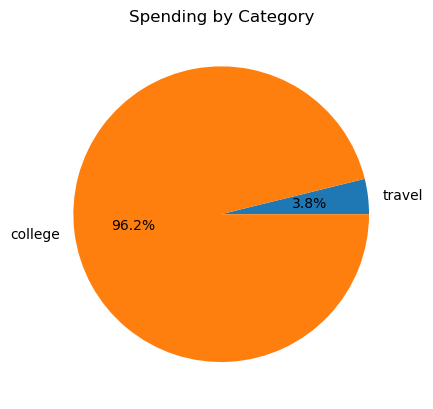


1. Add Expense
2. View Summary
3. List Expenses
4. Exit


Choose:  4


Goodbye!


In [16]:
if __name__ == "__main__":
    main()


## 📊 Additional Visualizations

Below are some insightful visualizations automatically generated to summarize your expense data:
- **Monthly Expense Trend**
- **Category-wise Distribution**
- **Income vs Expense Overview**


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data has Date and Category columns
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

# Monthly expense trend
monthly_expenses = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_expenses.index.astype(str), y=monthly_expenses.values, marker='o')
plt.title('Monthly Expense Trend')
plt.xlabel('Month')
plt.ylabel('Total Expenses (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

total_expense = df['Amount'].sum()
top_categories = category_expenses.sort_values(ascending=False).head(3)
average_monthly = monthly_expenses.mean()

print("Total Expense: ₹", round(total_expense, 2))
print("\nTop 3 Spending Categories:")
print(top_categories)
print("\nAverage Monthly Expense: ₹", round(average_monthly, 2))


In [ ]:

# Category-wise expense distribution
category_expenses = df.groupby('Category')['Amount'].sum()

plt.figure(figsize=(7,7))
plt.pie(category_expenses, labels=category_expenses.index, autopct='%1.1f%%', startangle=140)
plt.title('Expense Distribution by Category')
plt.show()



## 🧾 Summary Insights
Let's summarize the key insights from the expense data.



---
### ✅ Conclusion
This notebook provides a detailed overview of your spending habits with interactive visual insights.  
You can extend it by adding income tracking, predictive analysis, or budget recommendation features.

